In [14]:
import pandas as pd


In [15]:
import os
#os.listdir()


In [16]:
# Specify the name of your Excel file
file_name = 'MTBLS136.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_name)

# Display the DataFrame
print(df)



       Idx      SampleID  Class  Hormone  M1  M2  M3        M4         M5  \
0        1     063942_01    2.0  Nonuser NaN NaN NaN   95695.0  311381856   
1        2     037523_02    0.0   E-only NaN NaN NaN  503202.0   98715432   
2        3     073016_03    0.0   E-only NaN NaN NaN  104038.0  145110144   
3        4     061210_01    2.0  Nonuser NaN NaN NaN  366910.0  156989408   
4        5     063862_01    0.0   E-only NaN NaN NaN  608979.0  140037936   
...    ...           ...    ...      ...  ..  ..  ..       ...        ...   
1644  1645  IU_4945_1001    NaN      NaN NaN NaN NaN  115469.0  147413616   
1645  1646  IU_5881_1000    NaN      NaN NaN NaN NaN       NaN  141172224   
1646  1647  IU_5881_1001    NaN      NaN NaN NaN NaN       NaN  145479904   
1647  1648  IU_4945_1000    NaN      NaN NaN NaN NaN  478657.0  156384400   
1648  1649  IU_5193_1000    NaN      NaN NaN NaN NaN       NaN  148171072   

             M6  ...       M940       M941  M942        M943         M944  

In [17]:
print(df.head())


   Idx   SampleID  Class  Hormone  M1  M2  M3        M4         M5         M6  \
0    1  063942_01    2.0  Nonuser NaN NaN NaN   95695.0  311381856  4701657.0   
1    2  037523_02    0.0   E-only NaN NaN NaN  503202.0   98715432   753959.0   
2    3  073016_03    0.0   E-only NaN NaN NaN  104038.0  145110144        NaN   
3    4  061210_01    2.0  Nonuser NaN NaN NaN  366910.0  156989408   549563.0   
4    5  063862_01    0.0   E-only NaN NaN NaN  608979.0  140037936  1326962.0   

   ...       M940       M941  M942        M943         M944        M945  \
0  ...        NaN   641183.0   NaN  29736404.0  146489552.0  25615702.0   
1  ...  2544193.0   548504.0   NaN         NaN          NaN  39473920.0   
2  ...   403755.0   768151.0   NaN         NaN          NaN  25694854.0   
3  ...   561696.0  1008375.0   NaN         NaN          NaN  26806070.0   
4  ...    48161.0   750182.0   NaN         NaN          NaN  33121192.0   

       M946      M947       M948       M949  
0  125249.0  209

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

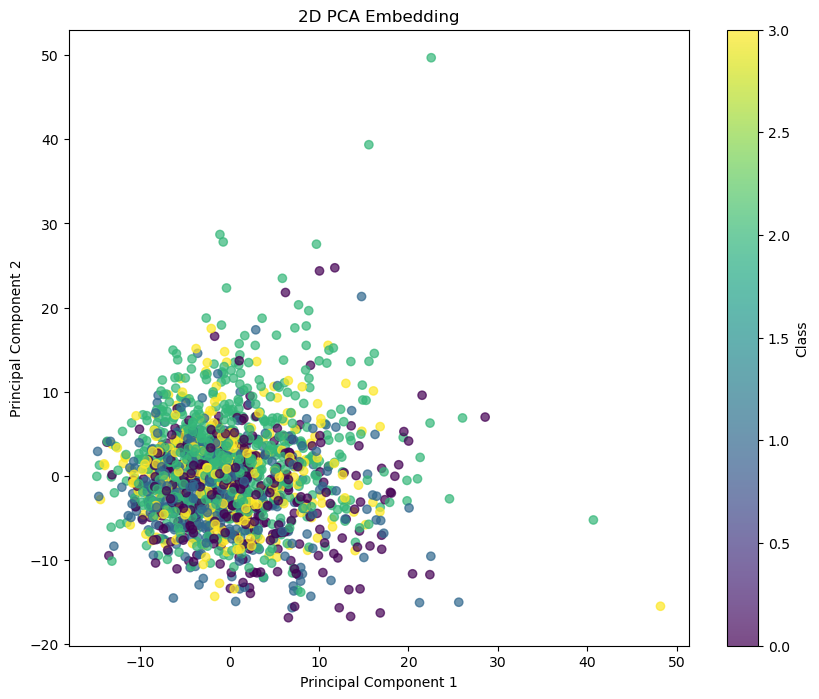

In [19]:
##Subtask 1: PCA
##Create a 2D-PCA embedding and create a scatter plot with points colored by class label 
##for both the digits and the breast cancer datasets.

# Handling missing values (optional: you can choose to drop or fill)
df = df.fillna(0)  # Fill NaNs with 0

# Extract features and labels
# Assuming 'Class' is the label column and rest are features
X = df.drop(columns=['Class', 'SampleID', 'Idx', 'Hormone'])
y = df['Class']

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y.values

# Plot the PCA embedding
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Class'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Embedding')
plt.colorbar(scatter, label='Class')
plt.show()

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


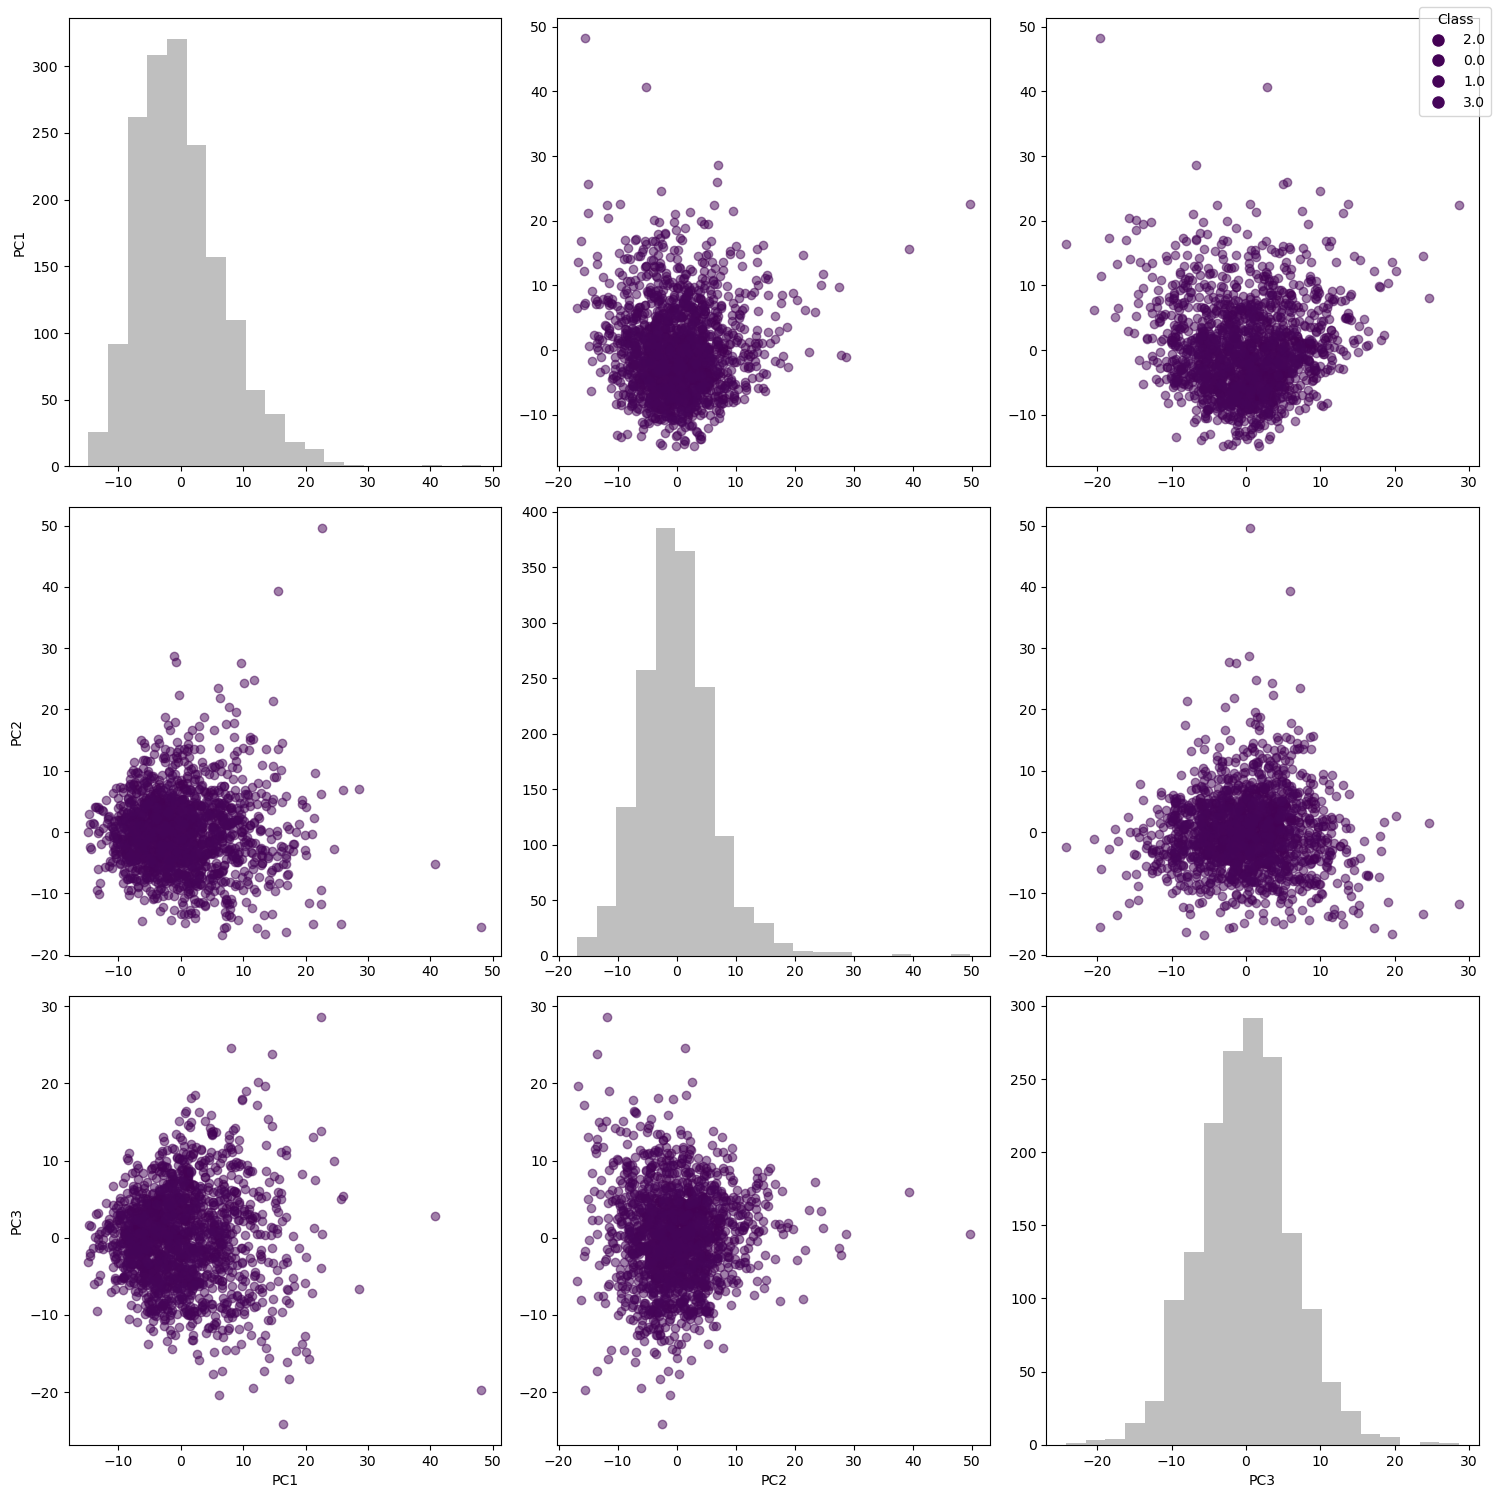

In [21]:
##Subtask 2: Scatter plot matrix (SPLOM)
##Write a func.on that produces a sca[er plot matrix using only matplotlib and visualize
##the sca[er plot matrix for a 3D-PCA embedding. Again, points should be colored by class label.


# Handling missing values (optional: you can choose to drop or fill)
df = df.fillna(0)  # Fill NaNs with 0

# Extract features and labels
# Assuming 'Class' is the label column and rest are features
X = df.drop(columns=['Class', 'SampleID', 'Idx', 'Hormone'])
y = df['Class']

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Class'] = y.values

def plot_splom(df, class_column, color_map='viridis'):
    """Creates a scatter plot matrix for a given DataFrame with points colored by class label."""
    features = df.columns.drop(class_column)
    num_features = len(features)
    fig, axes = plt.subplots(nrows=num_features, ncols=num_features, figsize=(15, 15))
    class_labels = df[class_column]
    unique_classes = class_labels.unique()
    colors = plt.get_cmap(color_map)(range(len(unique_classes)))
    color_dict = {cls: colors[i] for i, cls in enumerate(unique_classes)}

    for i in range(num_features):
        for j in range(num_features):
            ax = axes[i, j]
            if i == j:
                ax.hist(df[features[i]], bins=20, color='gray', alpha=0.5)
            else:
                for cls in unique_classes:
                    idx = class_labels == cls
                    ax.scatter(df.loc[idx, features[j]], df.loc[idx, features[i]], 
                               color=color_dict[cls], label=str(cls), alpha=0.5)
            if i == num_features - 1:
                ax.set_xlabel(features[j])
            if j == 0:
                ax.set_ylabel(features[i])
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[cls], 
                          markersize=10, label=str(cls)) for cls in unique_classes]
    fig.legend(handles=handles, title='Class', loc='upper right')
    plt.tight_layout()
    plt.show()

# Plot the scatter plot matrix
plot_splom(pca_df, class_column='Class')

In [22]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


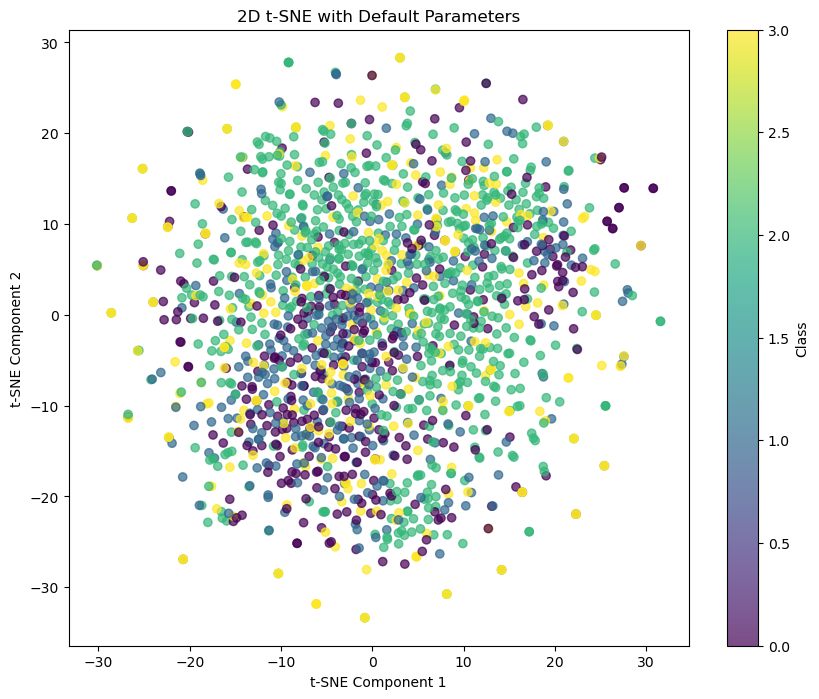

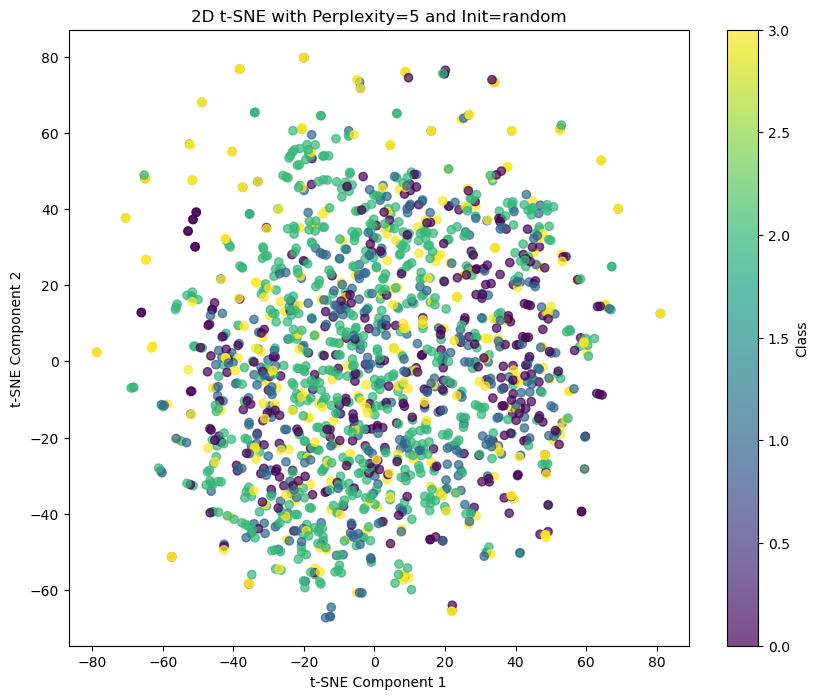

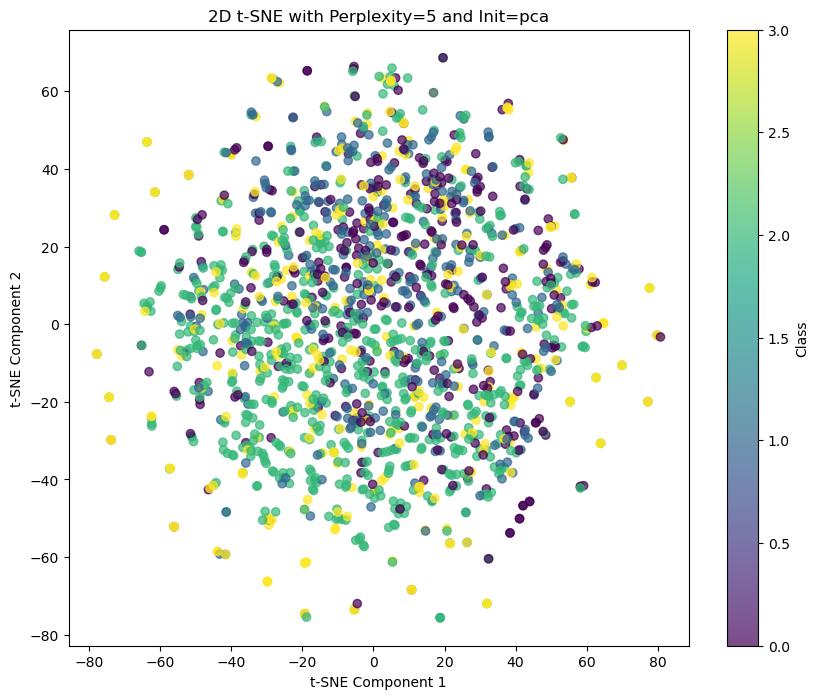

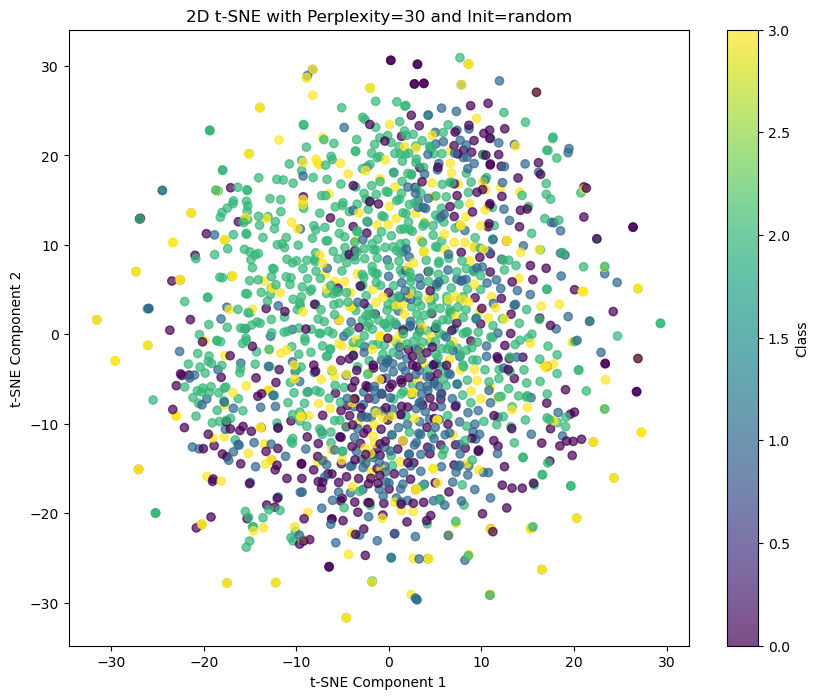

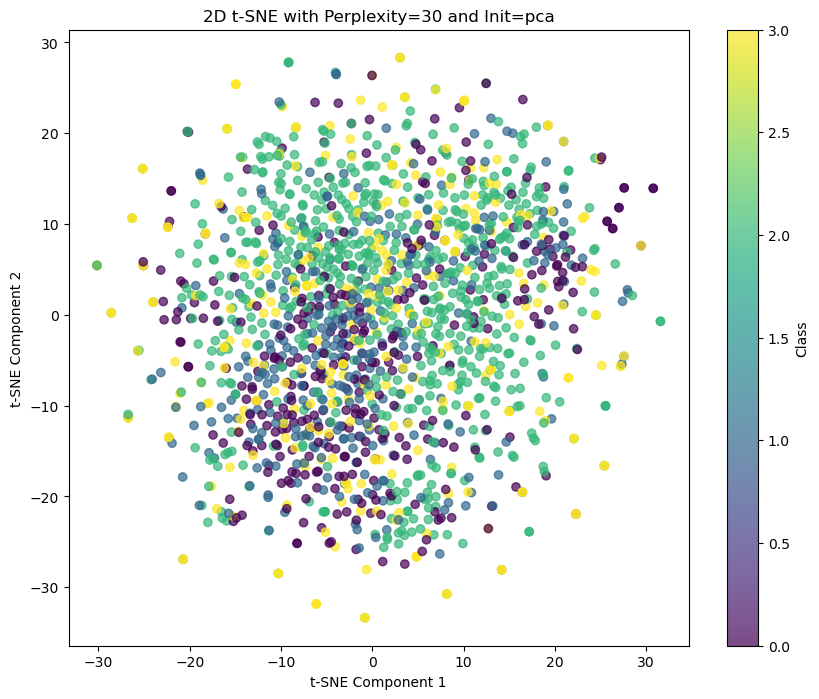

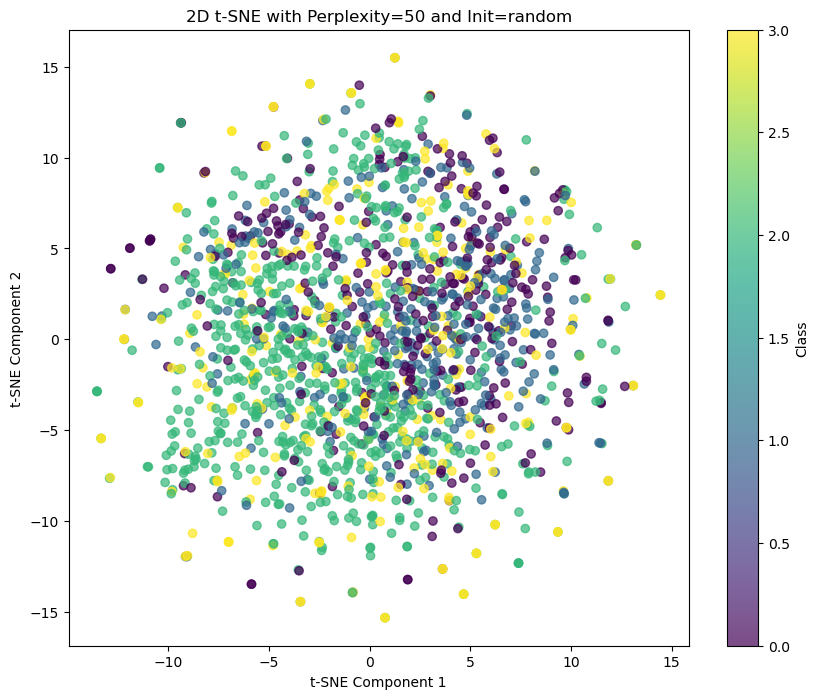

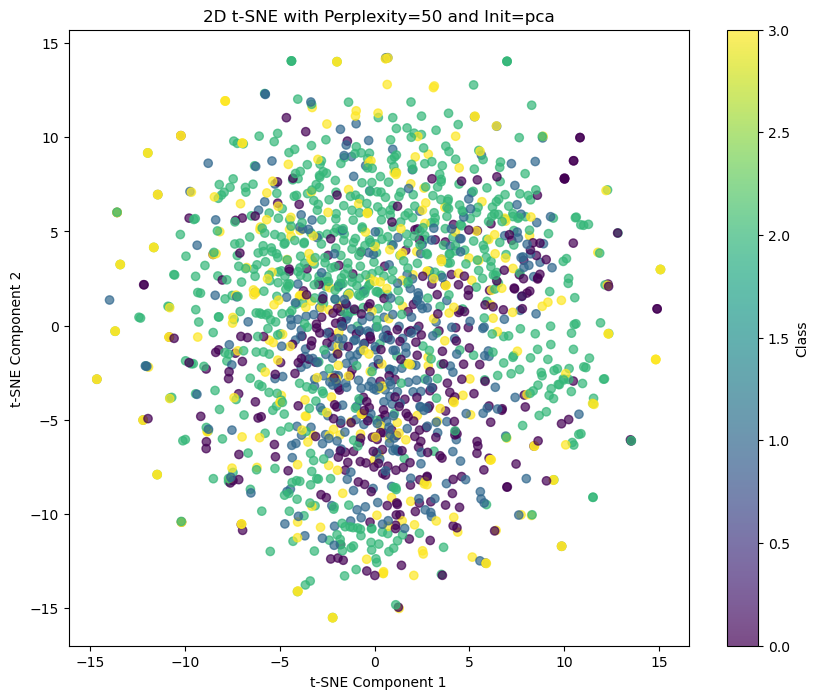

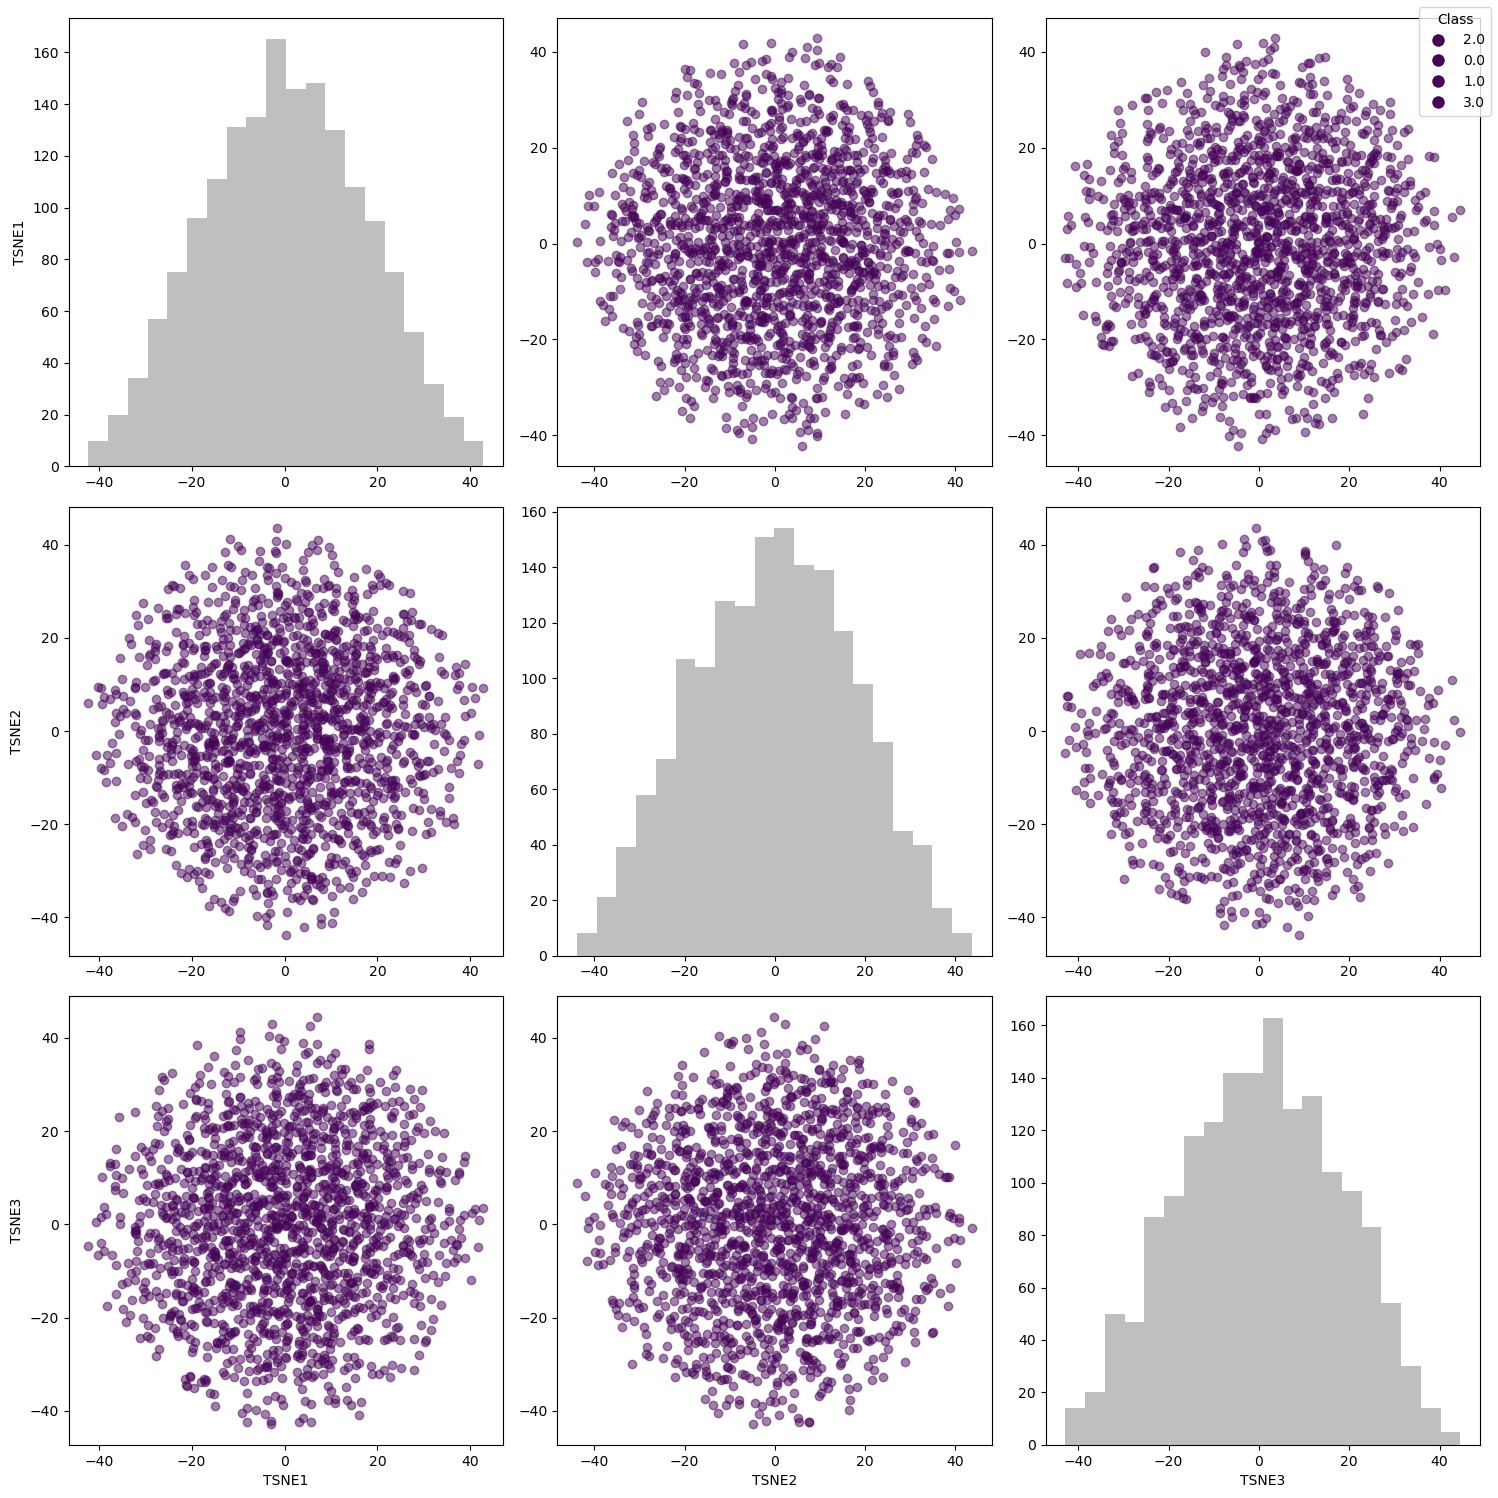

In [23]:
##Subtask 3: t-SNE
##Run 2-dim TSNE with default parameters and with increasing perplexity parameter values and different ini.aliza.on methods!
##Scatter-plot the points for the resul.ng embeddings colored by class label and explain your observa.ons!
##Create a 3-dim TSNE embedding and show it in the 3x3 sca[er plot matrix!


# Handling missing values (optional: you can choose to drop or fill)
df = df.fillna(0)  # Fill NaNs with 0

# Extract features and labels
# Assuming 'Class' is the label column and rest are features
X = df.drop(columns=['Class', 'SampleID', 'Idx', 'Hormone'])
y = df['Class']

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Function to plot t-SNE results and save as PDF
def plot_tsne(X, y, title, save_as=None):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.title(title)
    plt.colorbar(scatter, label='Class')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    if save_as:
        plt.savefig(save_as)
    plt.show()

# 2D t-SNE with default parameters
tsne_2d_default = TSNE(n_components=2, random_state=0)
X_tsne_2d_default = tsne_2d_default.fit_transform(X_standardized)
plot_tsne(X_tsne_2d_default, y, '2D t-SNE with Default Parameters', 'tsne_default.pdf')

# 2D t-SNE with different perplexity and initialization methods
perplexities = [5, 30, 50]
init_methods = ['random', 'pca']

for perp in perplexities:
    for init in init_methods:
        tsne_2d = TSNE(n_components=2, perplexity=perp, init=init, random_state=0)
        X_tsne_2d = tsne_2d.fit_transform(X_standardized)
        filename = f'tsne_perplexity_{perp}_init_{init}.pdf'
        plot_tsne(X_tsne_2d, y, f'2D t-SNE with Perplexity={perp} and Init={init}', filename)

# 3D t-SNE embedding
tsne_3d = TSNE(n_components=3, random_state=0)
X_tsne_3d = tsne_3d.fit_transform(X_standardized)
pca_df_3d = pd.DataFrame(data=X_tsne_3d, columns=['TSNE1', 'TSNE2', 'TSNE3'])
pca_df_3d['Class'] = y.values

# Function to plot scatter plot matrix for 3D embeddings and save as PDF
def plot_splom(df, class_column, color_map='viridis', save_as=None):
    features = df.columns.drop(class_column)
    num_features = len(features)
    fig, axes = plt.subplots(nrows=num_features, ncols=num_features, figsize=(15, 15))
    class_labels = df[class_column]
    unique_classes = class_labels.unique()
    colors = plt.get_cmap(color_map)(range(len(unique_classes)))
    color_dict = {cls: colors[i] for i, cls in enumerate(unique_classes)}

    for i in range(num_features):
        for j in range(num_features):
            ax = axes[i, j]
            if i == j:
                ax.hist(df[features[i]], bins=20, color='gray', alpha=0.5)
            else:
                for cls in unique_classes:
                    idx = class_labels == cls
                    ax.scatter(df.loc[idx, features[j]], df.loc[idx, features[i]], 
                               color=color_dict[cls], label=str(cls), alpha=0.5)
            if i == num_features - 1:
                ax.set_xlabel(features[j])
            if j == 0:
                ax.set_ylabel(features[i])
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[cls], 
                          markersize=10, label=str(cls)) for cls in unique_classes]
    fig.legend(handles=handles, title='Class', loc='upper right')
    plt.tight_layout()
    if save_as:
        plt.savefig(save_as)
    plt.show()

# Plot the 3D t-SNE scatter plot matrix and save as PDF
plot_splom(pca_df_3d, class_column='Class', save_as='tsne_3d_splom.pdf')





In [24]:
from sklearn.preprocessing import StandardScaler
import umap


/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


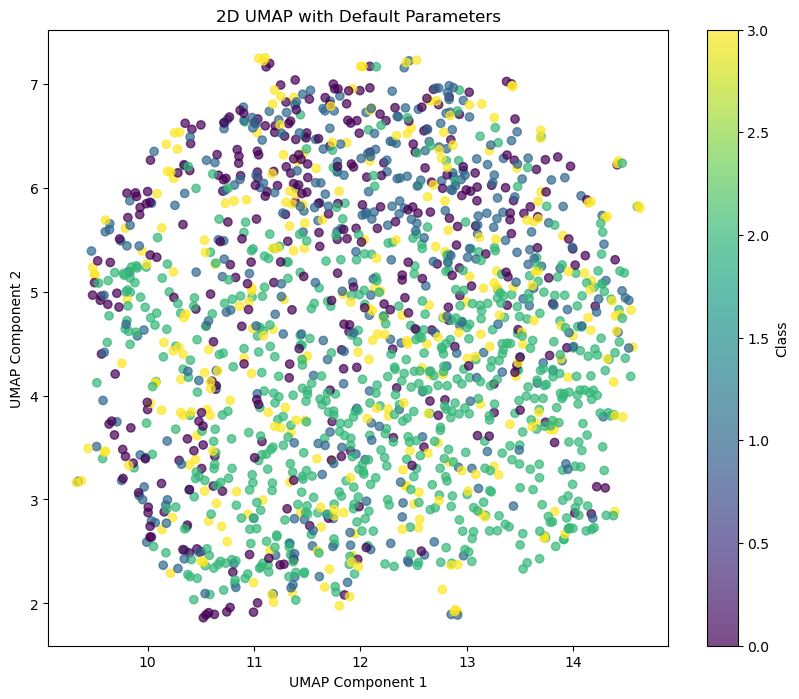

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.

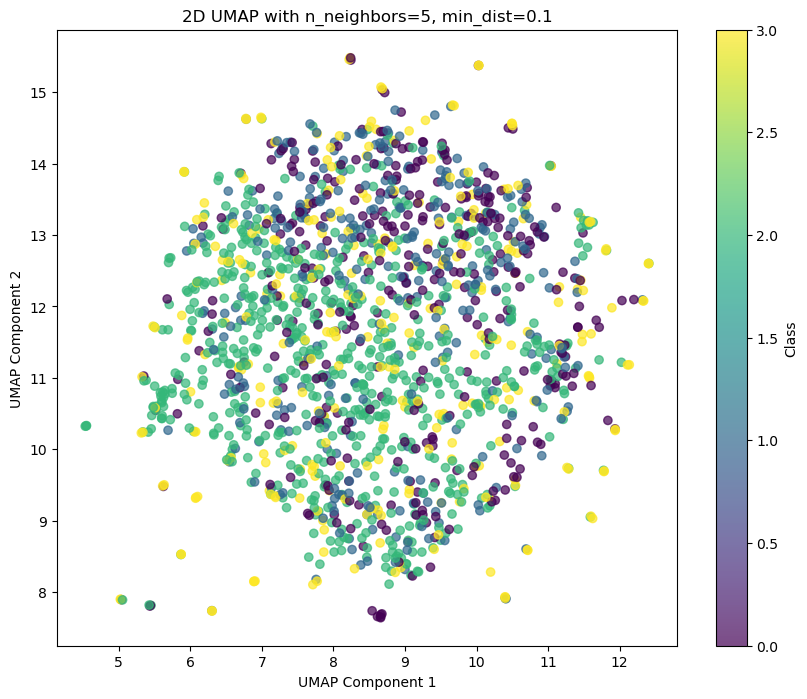

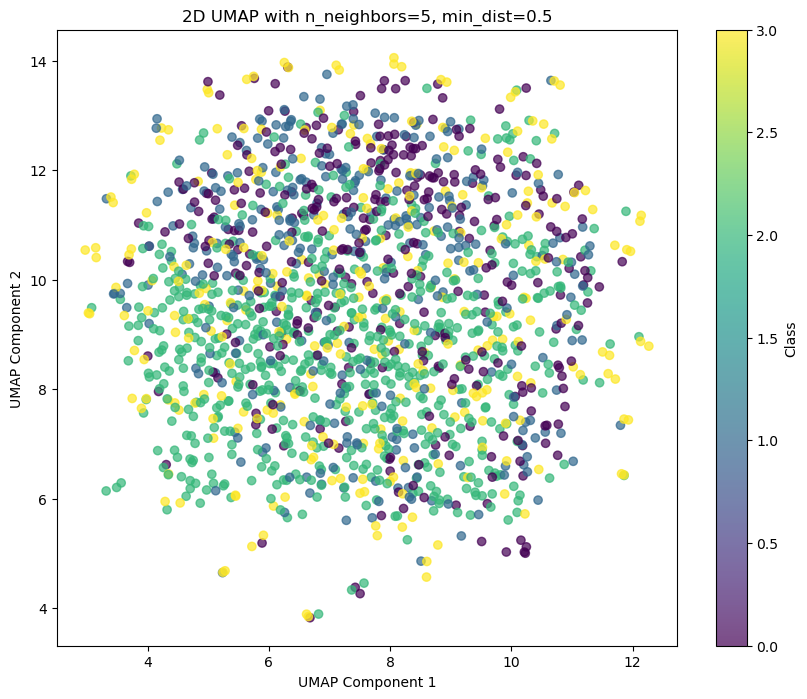

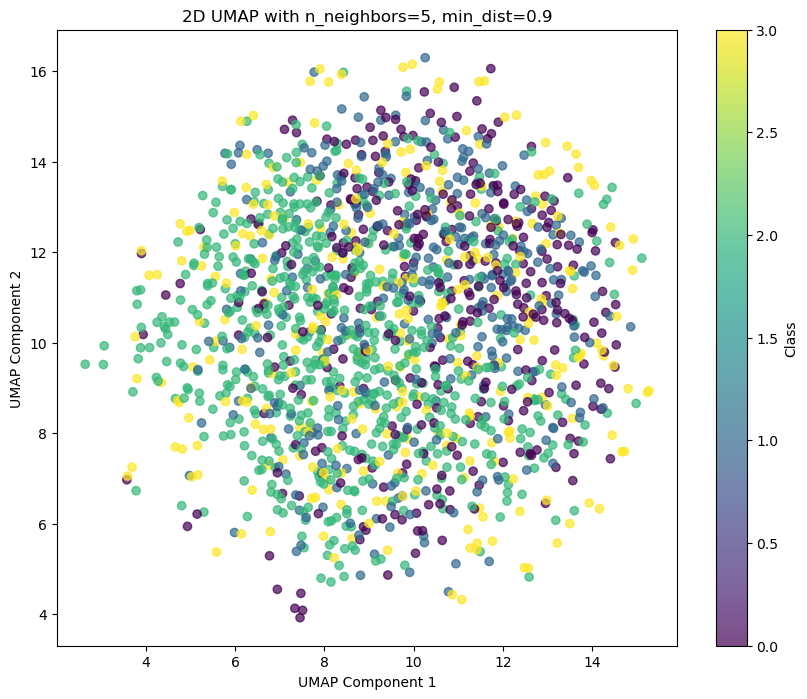

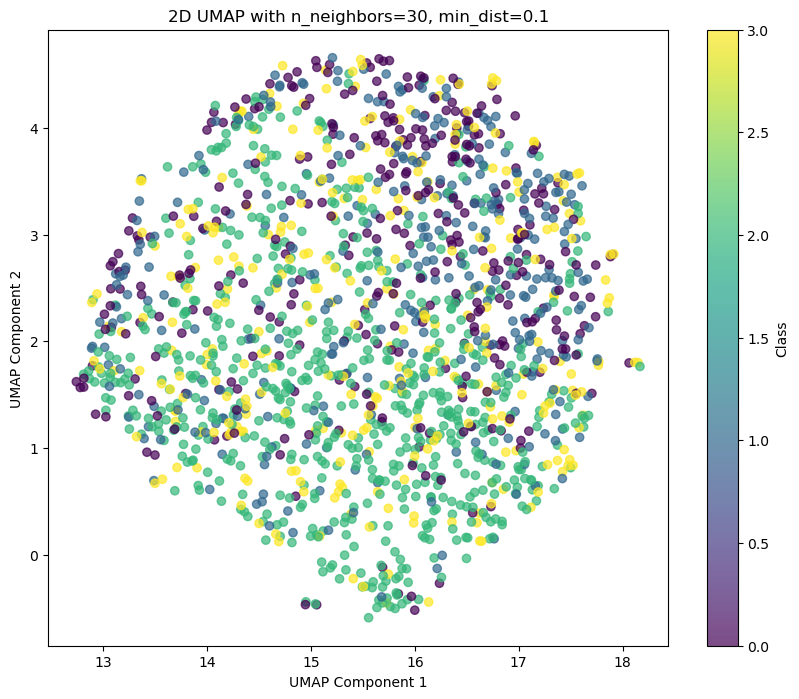

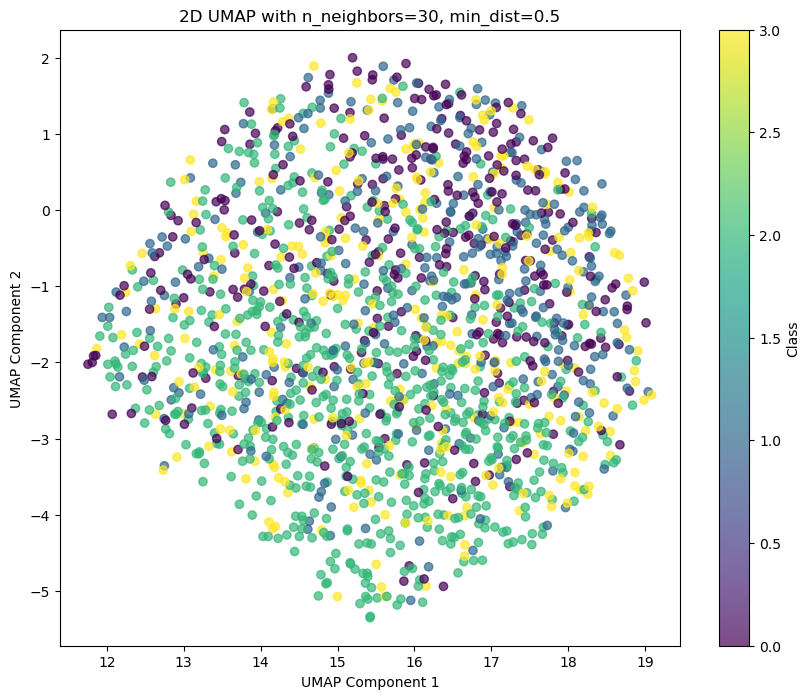

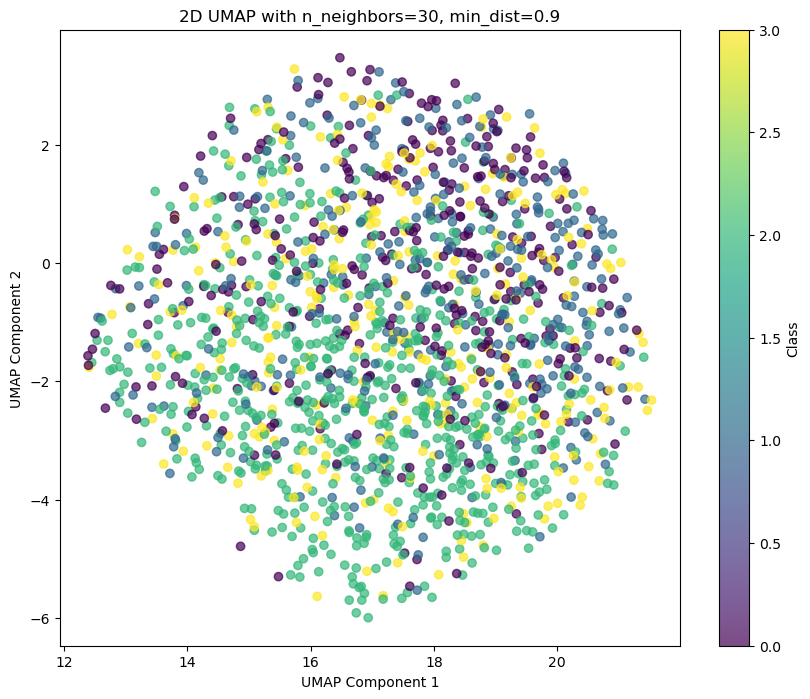

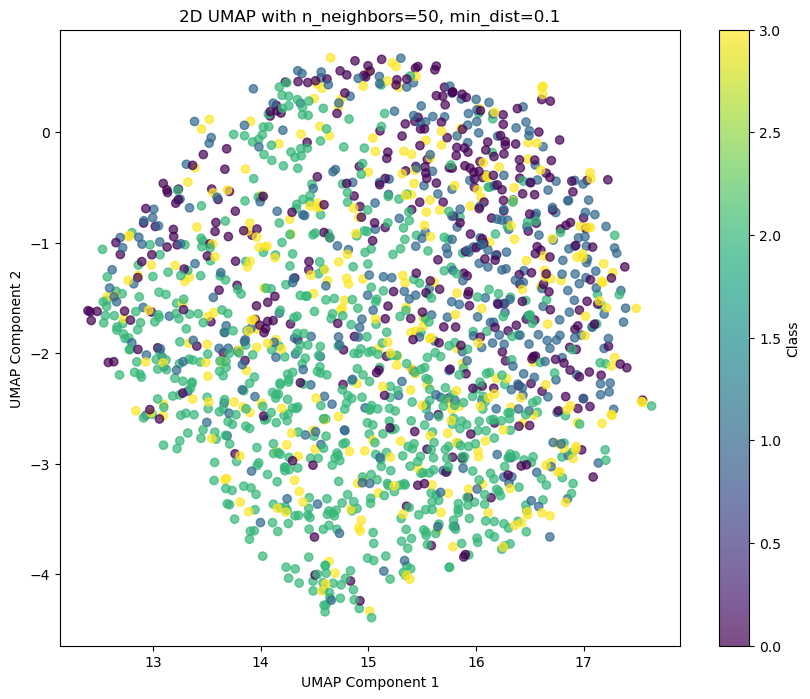

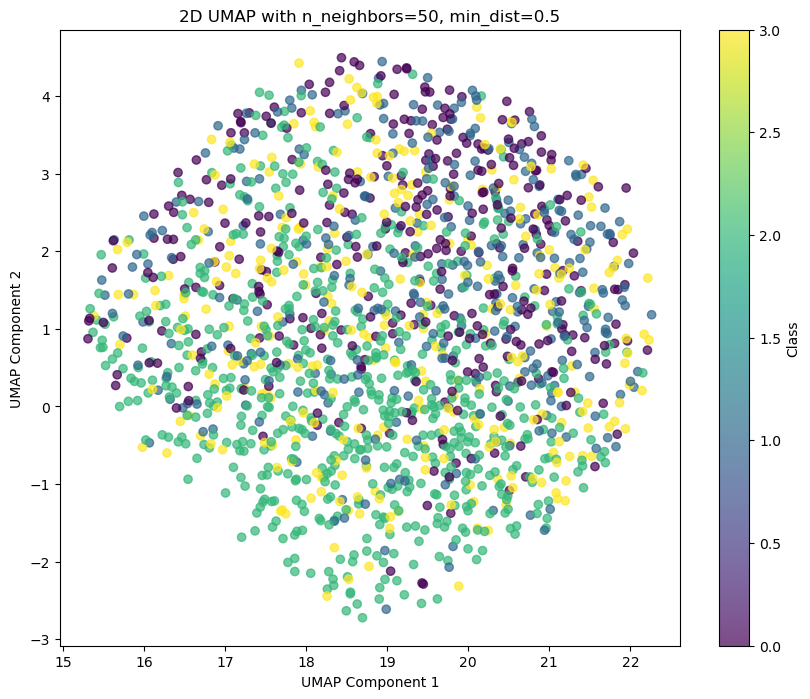

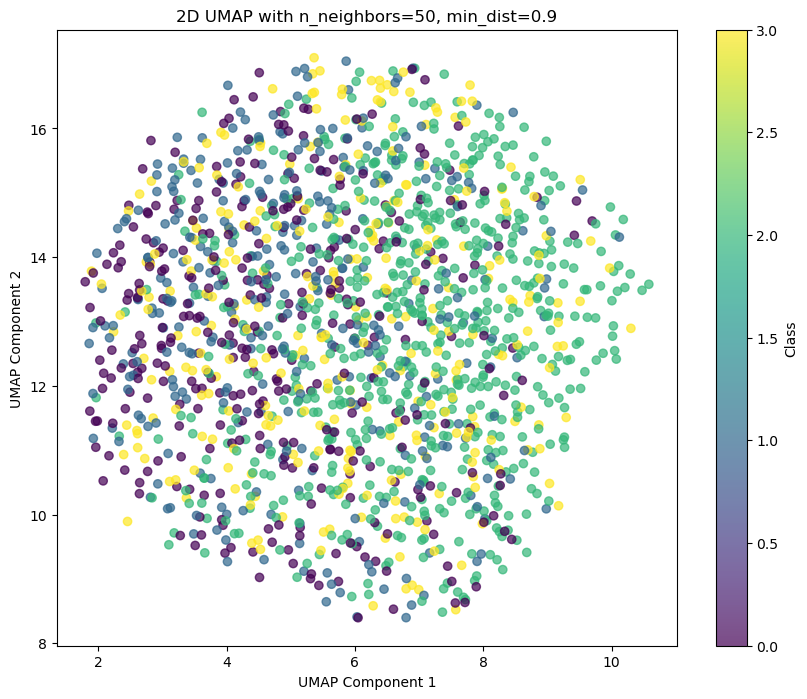

In [25]:
## Subtask 4: UMAP
##Install UMAP using `!pip install umap-learn`!
##Create 2-dim embedding with varying n_neighbours, min_dist parameters!
##Familiarize yourself with the algorithm behind UMAP and explain the observa.ons!

# Handling missing values (optional: you can choose to drop or fill)
df = df.fillna(0)  # Fill NaNs with 0

# Extract features and labels
# Assuming 'Class' is the label column and rest are features
X = df.drop(columns=['Class', 'SampleID', 'Idx', 'Hormone'])
y = df['Class']

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Function to plot UMAP results
def plot_umap(X, y, title, filename=None):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.title(title)
    plt.colorbar(scatter, label='Class')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    if filename:
        plt.savefig(filename)
    else:
        plt.show()


# UMAP with default parameters
umap_2d_default = umap.UMAP(random_state=0)
X_umap_2d_default = umap_2d_default.fit_transform(X_standardized)
plot_umap(X_umap_2d_default, y, '2D UMAP with Default Parameters')

# UMAP with different n_neighbors and min_dist parameters
n_neighbors_values = [5, 30, 50]
min_dist_values = [0.1, 0.5, 0.9]

for n_neighbors in n_neighbors_values:
    for min_dist in min_dist_values:
        umap_2d = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=0)
        X_umap_2d = umap_2d.fit_transform(X_standardized)
        filename = f'umap_n_neighbors_{n_neighbors}_min_dist_{min_dist}.pdf'
        plot_umap(X_umap_2d, y, f'2D UMAP with n_neighbors={n_neighbors}, min_dist={min_dist}', filename=filename)